In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

##Our Dataset

<Axes: >

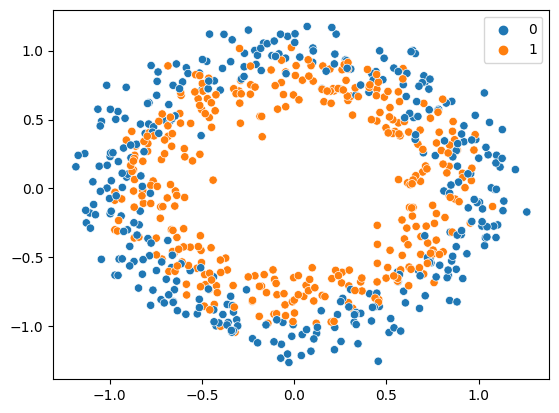

In [41]:
X, y = make_circles(n_samples=700, noise=0.12, random_state=1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [43]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, verbose=0)

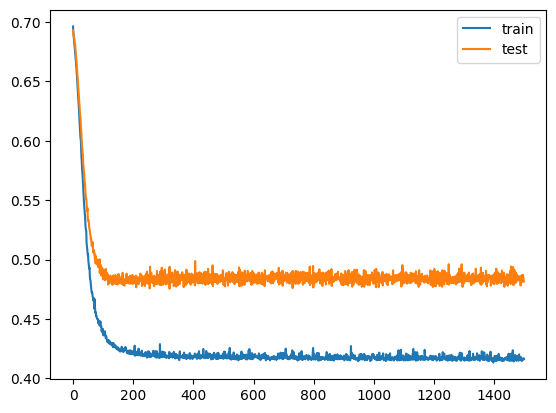

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#### After certain epochs at after around 150, it starts overfitting
So we can fix that by using early stopping - keras feature

## Now using Early Stopping

In [45]:
X, y = make_circles(n_samples=700, noise=0.12, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
# understand the parameters of early stopping- keras.io/api/callbacks/early_stopping/

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, callbacks=callback)

Epoch 1/1500
18/18 [==============================] - 1s 9ms/step - loss: 0.6924 - accuracy: 0.5143 - val_loss: 0.6920 - val_accuracy: 0.4786
Epoch 2/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5143 - val_loss: 0.6893 - val_accuracy: 0.4786
Epoch 3/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5071 - val_loss: 0.6875 - val_accuracy: 0.5214
Epoch 4/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5214 - val_loss: 0.6849 - val_accuracy: 0.5071
Epoch 5/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5589 - val_loss: 0.6830 - val_accuracy: 0.5143
Epoch 6/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5804 - val_loss: 0.6802 - val_accuracy: 0.5643
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5786 - val_loss: 0.6780 - val_accuracy: 0.5857
Epoch 

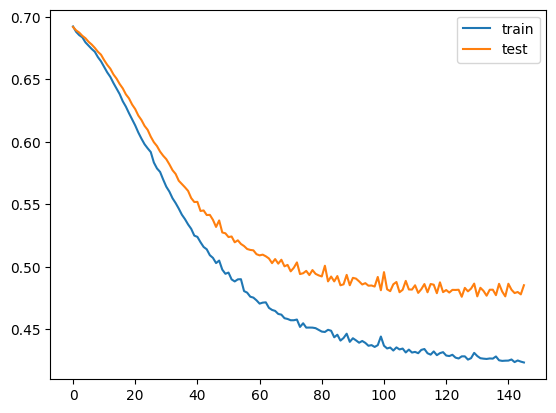

In [46]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()